# Week 1 授業課題 1

## 曽呂利新左衛門問題
>秀吉から褒美を下される際、何を希望するか尋ねられた新左衛門は、今日は米1粒、翌日には倍の2粒、その翌日には更に倍の4粒と、日ごとに倍の量の米を100日間もらう事を希望した。米粒なら大した事はないと思った秀吉は簡単に承諾したが、日ごとに倍ずつ増やして行くと100日後には膨大な量になる事に途中で気づき、他の褒美に変えてもらった。

## 【問題1】100日目の米粒の数

100日目には合計で米粒をいくつもらっているのかを計算するコードを作成し、答えを出力してください。また、1日目から100日目までの「その日にもらう米の数」と「その日までに累計で貰う米の数」の推移を折れ線グラフで表現してください。（縦軸が米の数、横軸が日数）


100日目にもらう米粒の数は6.34e+29粒です。


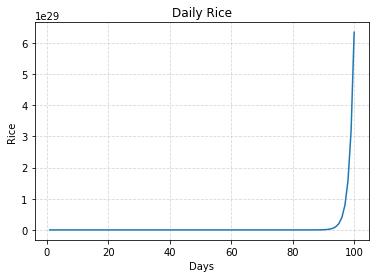

100日目までにもらう米粒の合計は1.27e+30粒です。


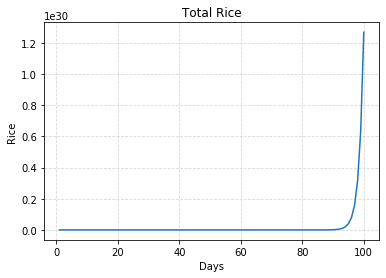

In [19]:
daily_rice_lst = []
total_rice_lst = []
n_day = []

for i in range(100):
    daily_rice = 2**i
    daily_rice_lst.append(daily_rice)
    total_rice_lst.append(sum(daily_rice_lst))
    n_day.append(i + 1)

print("100日目にもらう米粒の数は{:.2e}粒です。".format(daily_rice_lst[-1]))

import matplotlib.pyplot as plt
%matplotlib inline
plt.title("Daily Rice")
plt.xlabel("Days")
plt.ylabel("Rice")
plt.plot(n_day, daily_rice_lst)
plt.grid(ls='--',alpha=0.5)
plt.show()

print("100日目までにもらう米粒の合計は{:.2e}粒です。".format(total_rice_lst[-1]))

plt.title("Total Rice")
plt.xlabel("Days")
plt.ylabel("Rice")
plt.plot(n_day, total_rice_lst)
plt.grid(ls='--',alpha=0.5)
plt.show()

## 【問題2】100日目以外の米粒の数

この逸話は30日だったり81日だったりと日数が曖昧です。どの話にも対応できるように日数を引数とした 関数 を作成しましょう。関数を作成した上で、コースを受講する日数の間でいくつ米粒をもらえるかを答えてください。前の問題同様に折れ線グラフも出力してください。

コース受講最終日（120日目）にもらう米粒の数は6.65e+35粒です。


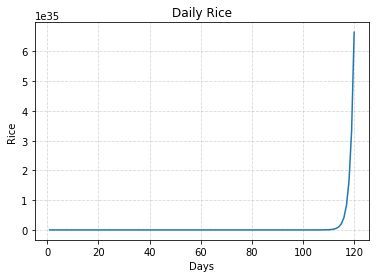

コース受講期間にもらう米粒の合計は1.33e+36粒です。


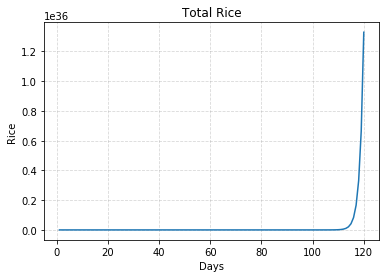

In [20]:
def compute_sorori_shinzaemon(days=100):
    
    daily_rice_lst = []
    total_rice_lst = []
    n_day = []

    for i in range(days):
        daily_rice = 2**i
        daily_rice_lst.append(daily_rice)
        total_rice_lst.append(sum(daily_rice_lst))
        n_day.append(i + 1)
    
    return n_day, daily_rice_lst, total_rice_lst

#コース受講期間にてもらえる米粒の数（days ＝ 120）
n_day, daily_rice_lst, total_rice_lst = compute_sorori_shinzaemon(days=120)

print("コース受講最終日（120日目）にもらう米粒の数は{:.2e}粒です。".format(daily_rice_lst[-1]))

%matplotlib inline
plt.title("Daily Rice")
plt.xlabel("Days")
plt.ylabel("Rice")
plt.plot(n_day, daily_rice_lst)
plt.grid(ls='--',alpha=0.5)
plt.show()

print("コース受講期間にもらう米粒の合計は{:.2e}粒です。".format(total_rice_lst[-1]))

plt.title("Total Rice")
plt.xlabel("Days")
plt.ylabel("Rice")
plt.plot(n_day, total_rice_lst)
plt.grid(ls='--',alpha=0.5)
plt.show()

## 【問題3】何人が何日生活できる米か

この米があれば何人が何日生活できるか計算する関数を作成してください。コースを受講する期間に貰える米粒で、このクラスにいる人数であれば、何日間生活できるかを出力してみましょう。

関数の最低限の入力は 米粒の数(int) と 人数(int) 、出力は 生活できる日数(int) です。関数名やコメントなどは分かりやすく考えて作成してください。

ここでは1日に必要な米粒の数は提示しません。自分なりに調べて、計算式に落とし込んでください。どう調べ、何を根拠にしたかもコメントを残しておいてください。

>厚生労働省によると、日本人成人の1日に必要な炭水化物由来の最低糖質量は100gとのこと「[日本人の食事摂取基準（2020年版）](https://www.mhlw.go.jp/content/10904750/000586559.pdf)」。[白米1膳（150g）には糖質が55g含まれている](https://toushitsu.jp/knowledge/advice/advice02/)ため、糖質100gは白米約1.8膳（272.7g）と分かる。
>
>米粒の計算方法については、とある猛者が白米160g分の粒数を7時間かけて数えており（[猛者の勇姿](http://kazudorei.hatenablog.com/entry/2015/01/24/133455)）、その数7764粒と判明。
>
>上記より、成人が生活するのに必要な1日の白米の量は、272.7g/160g * 7764粒 = 13233粒と計算できる。この粒数を基に本問題を解いていく。

In [40]:
def calc_days_survival(total_rice, n_ppl):
    
    days_survival = total_rice/(n_ppl*rice_necessary)
    
    return days_survival

N_PPL = 13              #コース受講人数
rice_necessary = 13233  #一人が1日あたり生活するのに必要な米粒の数
DAYS = 120              #コース受講期間

total_rice = compute_sorori_shinzaemon(DAYS)[2][-1]


result = calc_days_survival(total_rice, N_PPL)
result_yr  = result/(365e23)


print("米粒{:.2e}粒あれば、{}人が{:.2e}日生活できます。".format(total_rice, N_PPL, result))
print("年数に換算すると、{:,.0f}千垓年（億、兆、京、垓）です。".format(result_yr))



米粒1.33e+36粒あれば、13人が7.73e+30日生活できます。
年数に換算すると、211,692千垓年（億、兆、京、垓）です。
